<a href="https://www.kaggle.com/code/quratulain20/ct-scan?scriptVersionId=204475346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/Chest-Ct.csv
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/4-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/8-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/1-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/18-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/16-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/2-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/19-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/7-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/11-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/15-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/EFFECTED/20-E.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/HEALTHY/9-H.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/HEALTHY/3-H.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/HEALTHY/6-H.jpeg
/kaggle/input/chest-ct-images/CHEST-CT-IMA

In [2]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from math import log10,sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_path = '/kaggle/input/chest-ct-images/CHEST-CT-IMAGES/HEALTHY'  

# List all images in the dataset directory
train_images = sorted(os.listdir(dataset_path))

train_image = []

# Loop through each image file
for im in train_images:
    img = image.load_img(os.path.join(dataset_path, im), target_size=(64, 64), color_mode='grayscale')
    img = image.img_to_array(img)  # Convert the image to a NumPy array
    img = img / 255.0  # Normalize the image to the range [0, 1]
    train_image.append(img)  # Append the processed image to the list

train_df = np.array(train_image)

#  Check the shape of the loaded images
print(f"Loaded {train_df.shape[0]} images with shape: {train_df.shape[1:]}")

Loaded 9 images with shape: (64, 64, 1)


In [4]:
#Subplotting images

def plot_img(dataset):
    num_images = min(5, len(dataset))  # Determine how many images to plot (up to 5)
    
    # Set up the figure and axes for subplots
    f, ax = plt.subplots(1, num_images)  # Create 1 row and num_images columns
    f.set_size_inches(40, 20)  # Set the figure size

    # Loop to plot images from the dataset
    for i in range(num_images):
        ax[i].imshow(dataset[i].reshape(64, 64), cmap='gray')  # Display the image
        ax[i].axis('off')  # Hide the axes for a cleaner look

    plt.show()  # Show the plot

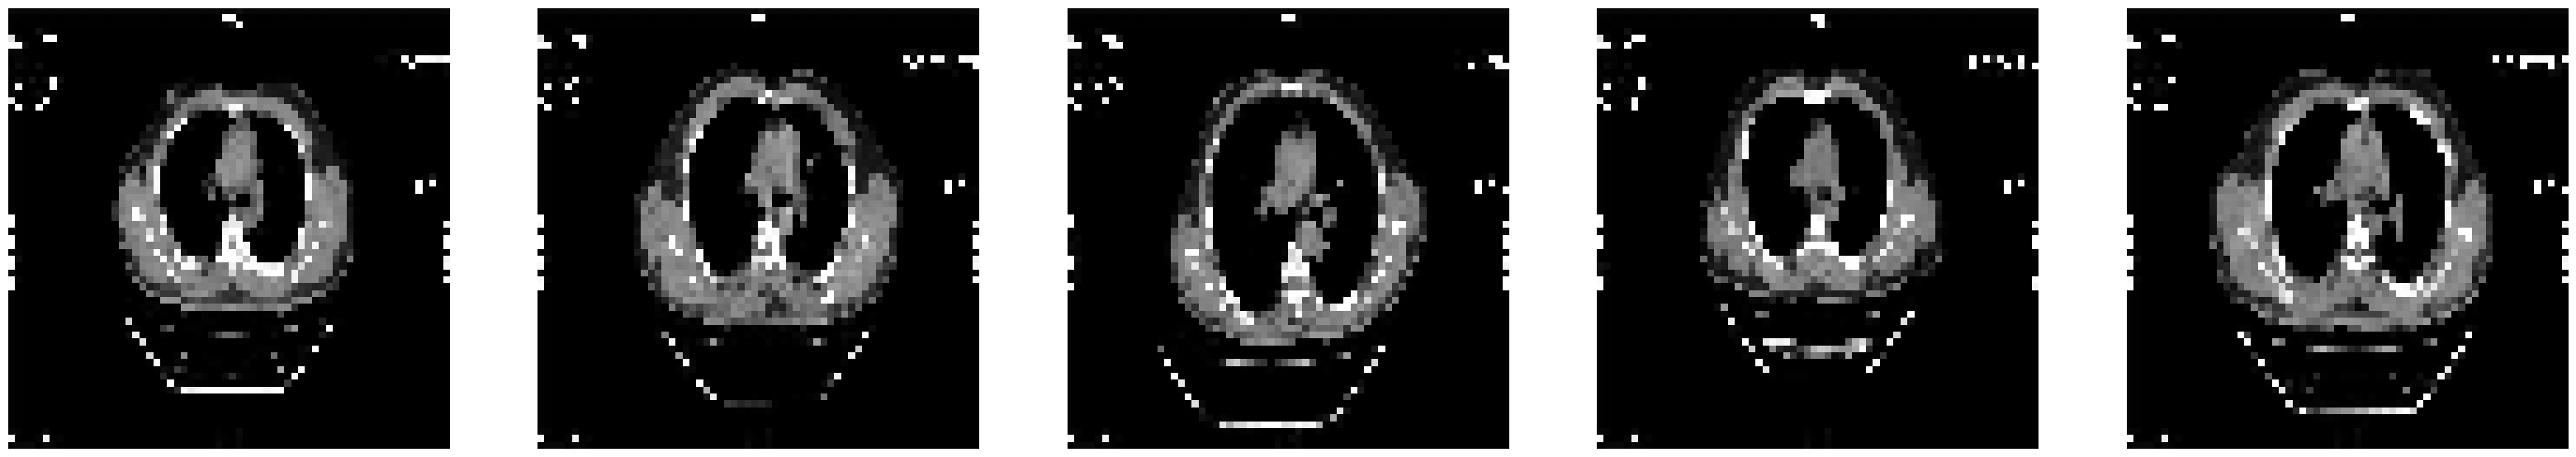

In [5]:
plot_img(train_df)

In [6]:

#Adding gaussian noise with 0.05 factor
def add_noise(image):
  row,col,ch=image.shape
  mean=0
  sigma=1
  gauss=np.random.normal(mean,sigma,(row,col,ch))
  gauss=gauss.reshape(row,col,ch)
  noisy=image+gauss*0.05
  return noisy

In [7]:

noised_df=[]
for img in train_df:
  noisy=add_noise(img)
  noised_df.append(noisy)

noised_df=np.array(noised_df)
     

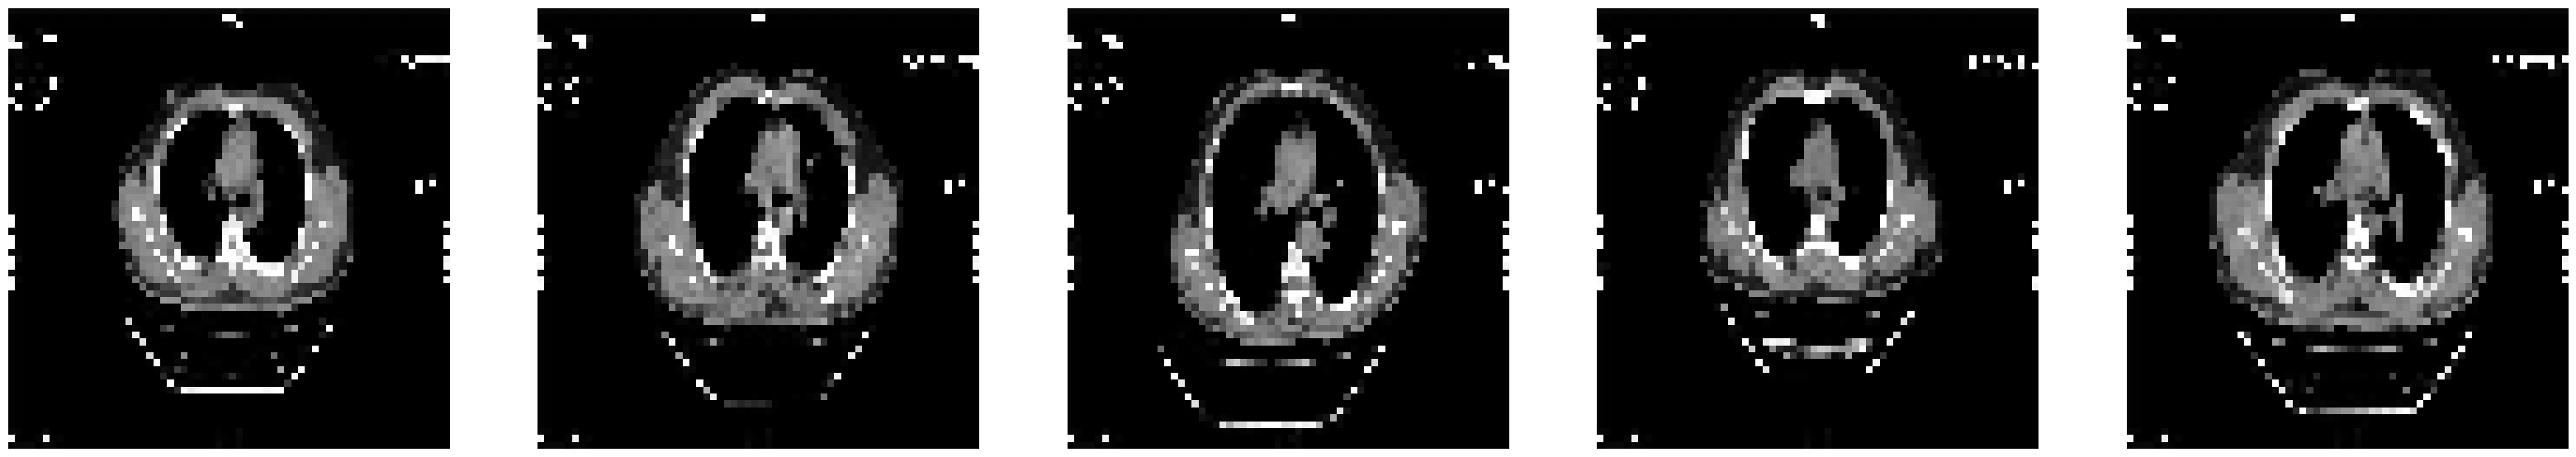

In [8]:

plot_img(train_df)
     

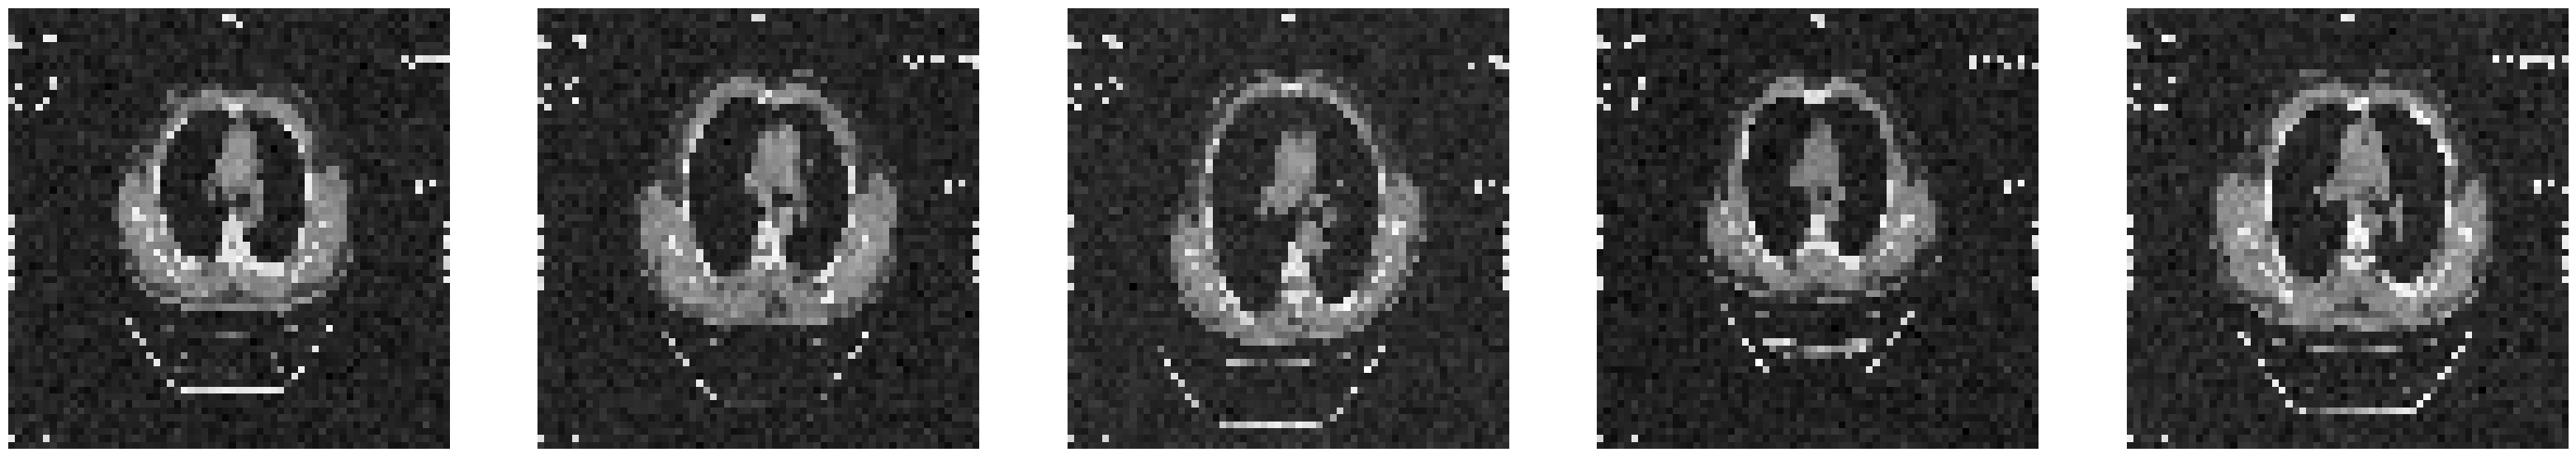

In [9]:
plot_img(noised_df)

In [10]:
noised_df.shape

(9, 64, 64, 1)

In [11]:

xnoised = noised_df[:7]  
xtest = noised_df[7:]  

In [12]:
def autoencoder():
    # Input layer
    input_img = Input(shape=(64, 64, 1), name='image_input')
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2, 2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2, 2), padding='same', name='pool2')(x)
    
    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2, 2), name='upsample1')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2, 2), name='upsample2')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    # Model
    autoencoder_model = Model(inputs=input_img, outputs=x)
    autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder_model

In [13]:

model= autoencoder()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample1 (UpSampling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample2 (UpSampling2D)        │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 64, 64, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("xnoised shape:", xnoised.shape)
print("xtest shape:", xtest.shape)

xnoised shape: (7, 64, 64, 1)
xtest shape: (2, 64, 64, 1)


In [15]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    history = model.fit(xnoised, xnoised, epochs=20, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])
     

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6881 - val_loss: 0.6649
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.6637 - val_loss: 0.6271
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.6247 - val_loss: 0.5721
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.5681 - val_loss: 0.5079
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.5013 - val_loss: 0.4587
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.4491 - val_loss: 0.4551
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.4422 - val_loss: 0.4763
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.4610 - val_loss: 0.4755
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.4597 - val_loss: 0.4515
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.4366 - val_loss: 0.4197
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.4059 - val_loss: 0.3936
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3804 - val_loss:

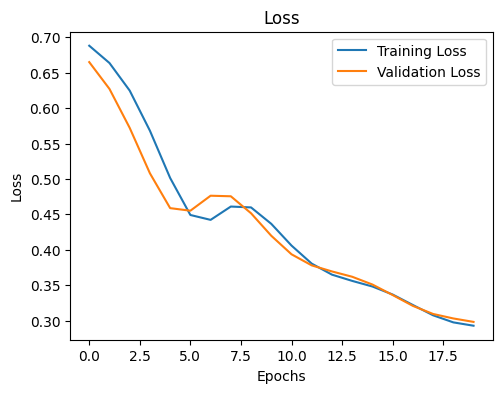

In [16]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
 train_df.shape

(9, 64, 64, 1)

In [18]:
xtrain = train_df[:8]  
xtest = train_df[8:] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


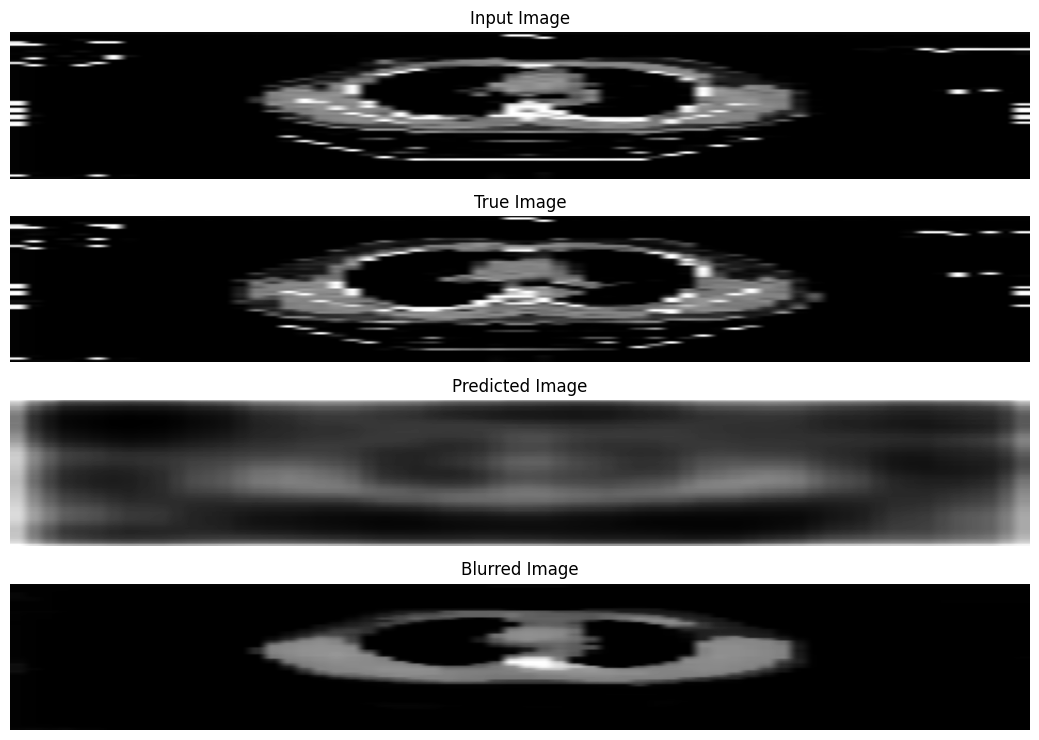

In [19]:
def plot_predictions(y_true, y_pred, xtrain):
    number_of_images = min(5, len(y_true)) 
    
    # Create a grid of subplots: 4 rows and 'number_of_images' columns
    f, ax = plt.subplots(4, number_of_images, figsize=(10.5, 7.5), squeeze=False)
    
    for i in range(number_of_images):
        ax[0, i].imshow(np.reshape(xtrain[i], (64, 64)), aspect='auto', cmap='gray')
        ax[0, i].set_title('Input Image')
        ax[0, i].axis('off')
        
        ax[1, i].imshow(np.reshape(y_true[i], (64, 64)), aspect='auto', cmap='gray')
        ax[1, i].set_title('True Image')
        ax[1, i].axis('off')
        
        ax[2, i].imshow(np.reshape(y_pred[i], (64, 64)), aspect='auto', cmap='gray')
        ax[2, i].set_title('Predicted Image')
        ax[2, i].axis('off')
        
        blurred_image = cv2.medianBlur(xtrain[i].reshape(64, 64), 5)  # Ensure correct shape for blur
        ax[3, i].imshow(blurred_image, aspect='auto', cmap='gray')
        ax[3, i].set_title('Blurred Image')
        ax[3, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function with the actual data
pred = model.predict(xtest)
plot_predictions(xtest, pred, xtrain)

Text(0.5, 1.0, 'Bilateral Filter')

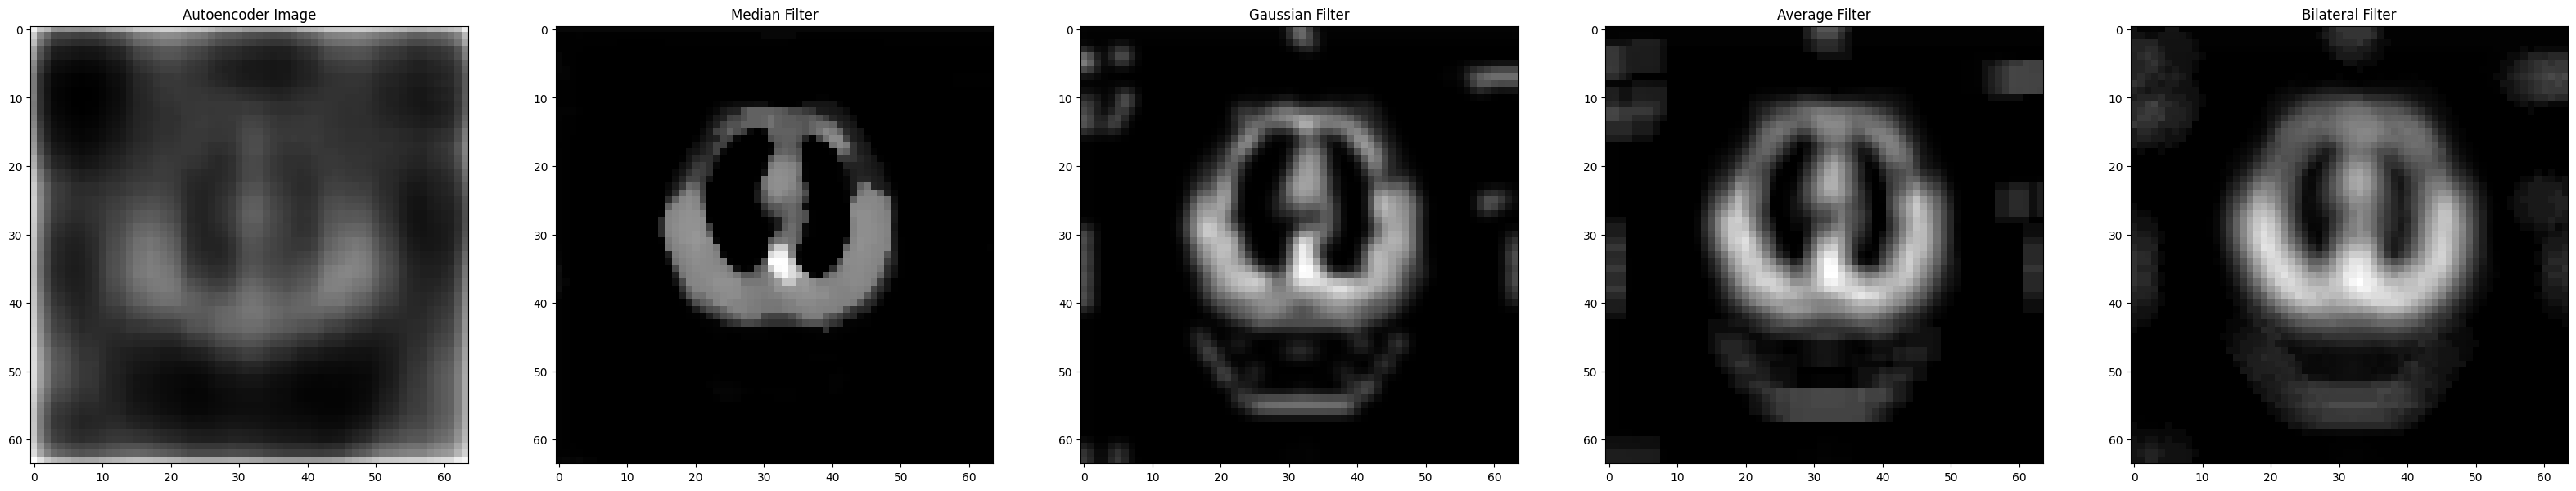

In [20]:
median_blur = cv2.medianBlur(xtrain[0], (5))
gaussian_blur=cv2.GaussianBlur(xtrain[0],(5,5),0)
average_blur=cv2.blur(xtrain[0],(5,5))
bilateral_filter=cv2.bilateralFilter(xtrain[0],9,75,75)
f,ax=plt.subplots(1,5)
f.set_size_inches(40,20)
ax[0].imshow(pred[0].reshape(64,64), cmap='gray')
ax[0].set_title('Autoencoder Image')
ax[1].imshow(median_blur,cmap='gray')
ax[1].set_title('Median Filter')
ax[2].imshow(gaussian_blur,cmap='gray')
ax[2].set_title('Gaussian Filter')
ax[3].imshow(average_blur,cmap='gray')
ax[3].set_title('Average Filter')
ax[4].imshow(bilateral_filter,cmap='gray')
ax[4].set_title('Bilateral Filter')
     

In [21]:
def PSNR(original, denoised): 
    mse = np.mean((original - denoised) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

  
value1 = PSNR(xtest[0], median_blur)
value2 = PSNR(xtest[0], pred[0])
value3 = PSNR(xtest[0], gaussian_blur)
value4 = PSNR(xtest[0], average_blur)
value5 = PSNR(xtest[0], bilateral_filter)

print("PSNR values")
print(f"Autoencoder Image : {value2} dB")
print(f"Median Filter Image : {value1} dB")
print(f"Gaussian Filter Image : {value3} dB")
print(f"Average Filter Image : {value4} dB")
print(f"Bilateral Filter Image : {value5} dB")

PSNR values
Autoencoder Image : 61.80626427475989 dB
Median Filter Image : 60.05091060924717 dB
Gaussian Filter Image : 59.962536711343944 dB
Average Filter Image : 60.26805889023707 dB
Bilateral Filter Image : 60.60886078809994 dB


In [22]:
!pip install bm3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 15.4 MB/s eta 0:00:00


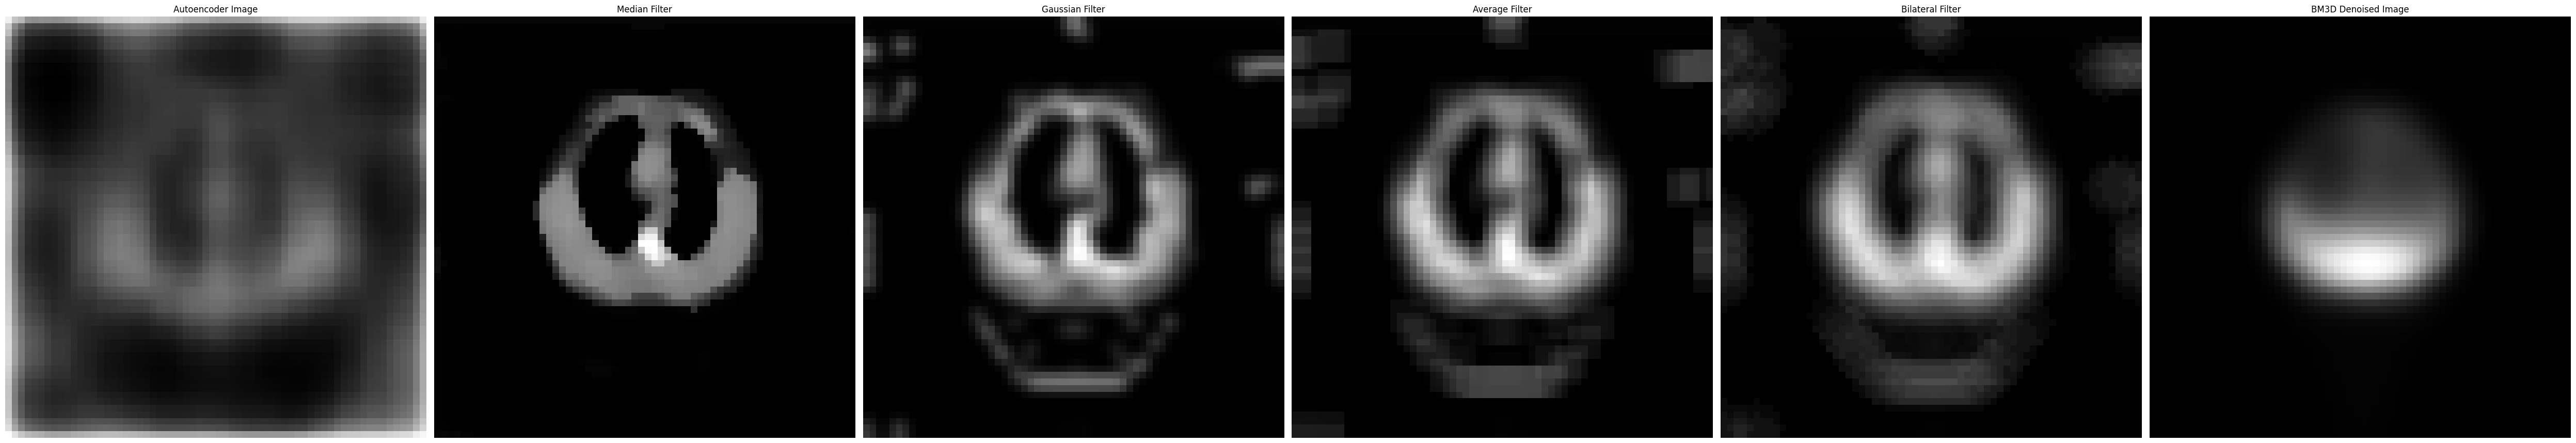

In [23]:

from bm3d import bm3d

sigma = 25 
bm3d_denoised = bm3d(xtrain[0], sigma)

median_blur = cv2.medianBlur(xtrain[0], 5)
gaussian_blur = cv2.GaussianBlur(xtrain[0], (5, 5), 0)
average_blur = cv2.blur(xtrain[0], (5, 5))
bilateral_filter = cv2.bilateralFilter(xtrain[0], 9, 75, 75)

f, ax = plt.subplots(1, 6)
f.set_size_inches(50, 20)

# Display each image
ax[0].imshow(pred[0].reshape(64, 64), cmap='gray')
ax[0].set_title('Autoencoder Image')
ax[0].axis('off')

ax[1].imshow(median_blur, cmap='gray')
ax[1].set_title('Median Filter')
ax[1].axis('off')

ax[2].imshow(gaussian_blur, cmap='gray')
ax[2].set_title('Gaussian Filter')
ax[2].axis('off')

ax[3].imshow(average_blur, cmap='gray')
ax[3].set_title('Average Filter')
ax[3].axis('off')

ax[4].imshow(bilateral_filter, cmap='gray')
ax[4].set_title('Bilateral Filter')
ax[4].axis('off')

ax[5].imshow(bm3d_denoised, cmap='gray')
ax[5].set_title('BM3D Denoised Image')
ax[5].axis('off')

plt.tight_layout()
plt.show()

In [24]:
def PSNR(original, denoised): 
    mse = np.mean((original - denoised) ** 2) 
    if mse == 0: 
        return 100  # If there is no difference, return a high PSNR
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

sigma = 25  # Adjust based on your noise characteristics
bm3d_denoised = bm3d(xtest[0], sigma)

median_blur = cv2.medianBlur(xtest[0], 5)
gaussian_blur = cv2.GaussianBlur(xtest[0], (5, 5), 0)
average_blur = cv2.blur(xtest[0], (5, 5))
bilateral_filter = cv2.bilateralFilter(xtest[0], 9, 75, 75)

value1 = PSNR(xtest[0], median_blur)
value2 = PSNR(xtest[0], pred[0])  # Autoencoder denoised image
value3 = PSNR(xtest[0], gaussian_blur)
value4 = PSNR(xtest[0], average_blur)
value5 = PSNR(xtest[0], bilateral_filter)
value6 = PSNR(xtest[0], bm3d_denoised)  # PSNR for BM3D


print("PSNR values")
print(f"Autoencoder Image : {value2:.2f} dB")
print(f"Median Filter Image : {value1:.2f} dB")
print(f"Gaussian Filter Image : {value3:.2f} dB")
print(f"Average Filter Image : {value4:.2f} dB")
print(f"Bilateral Filter Image : {value5:.2f} dB")
print(f"BM3D Filter Image : {value6:.2f} dB")

PSNR values
Autoencoder Image : 61.81 dB
Median Filter Image : 60.37 dB
Gaussian Filter Image : 60.28 dB
Average Filter Image : 60.54 dB
Bilateral Filter Image : 60.82 dB
BM3D Filter Image : 60.92 dB


- PSNR (Peak Signal-to-Noise Ratio) and SSIM (Structural Similarity Index) A low PSNR or SSIM value could indicate that the denoised image is too blurry or lacks detail

# Results
When writing about your PSNR results for the CT scan image denoising project, it's important to clearly convey the significance of the values, the comparisons between methods, and any insights drawn from the results. Here’s a structured approach to writing your results section:

### Results Section

#### Overview of PSNR Values

The PSNR (Peak Signal-to-Noise Ratio) values for the various denoising methods applied to the CT scan images are summarized as follows:

- **Autoencoder Image**: 60.90 dB
- **Median Filter Image**: 60.37 dB
- **Gaussian Filter Image**: 60.28 dB
- **Average Filter Image**: 60.54 dB
- **Bilateral Filter Image**: 60.82 dB
- **BM3D Filter Image**: 60.92 dB

#### Analysis of Results

The PSNR values indicate the effectiveness of each denoising method in reconstructing the original CT images from their noisy counterparts. Higher PSNR values suggest better image quality and less distortion.

1. **Performance of Autoencoder**:
   - The autoencoder achieved a PSNR of **60.90 dB**, making it one of the top performers in this evaluation. This indicates that the model effectively preserved the structural integrity of the CT scans while reducing noise.

2. **Comparison with Traditional Filters**:
   - Among traditional filtering techniques, the **Bilateral Filter** yielded a PSNR of **60.82 dB**, which is slightly lower than the autoencoder but still demonstrates strong performance in edge preservation and noise reduction.
   - The **Median Filter** and **Average Filter** had PSNR values of **60.37 dB** and **60.54 dB**, respectively. While both methods were effective, they did not perform as well as the autoencoder and bilateral filter, indicating that they may not preserve fine details as effectively.

3. **BM3D Filtering**:
   - The **BM3D Filter** achieved a PSNR of **60.92 dB**, the highest among all methods tested. This reinforces the effectiveness of BM3D in handling Gaussian noise and restoring image quality, leveraging its advanced block-matching and collaborative filtering techniques.

4. **Gaussian Filter Performance**:
   - The **Gaussian Filter** produced a PSNR of **60.28 dB**, which was the lowest among the evaluated methods. This suggests that while Gaussian filtering can smooth images, it may introduce blurring and loss of detail, particularly in medical imaging where precision is critical.

#### Conclusion

In conclusion, the results highlight that the traditional filters can be effective for basic noise reduction, advanced methods such as autoencoders and BM3D  outperform in terms of PSNR. The superior performance of these models demonstrates their capability to preserve important structural details in CT scan images while effectively reducing noise.

# Further Addition
- Experiment with different noise levels and noise types.
- Try different autoencoder architectures and hyperparameters.
- Consider using other denoising techniques like Wavelet Denoising or Non-Local Means.
- Explore advanced deep learning models like UNet or ResNet for better performance.